## **Importing Necessary Libraries**

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##**Importing Data**

In [11]:
dataset = pd.read_csv('Bigmart sales.csv')
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## **Exploratory Data Analysis**

In [12]:
print('Shape of Dataset','\n',dataset.shape)
print('\nNull values in Dataset ','\n',dataset.isna().sum())
print('\nData Types ','\n',dataset.dtypes)

Shape of Dataset 
 (8523, 12)

Null values in Dataset  
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data Types  
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


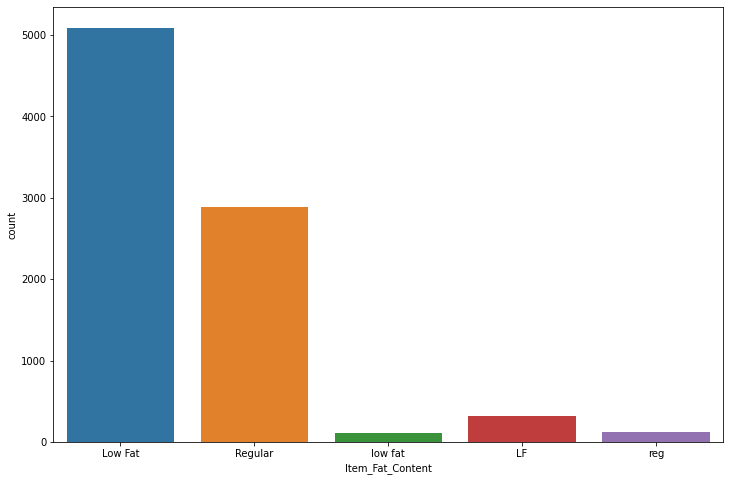

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(dataset['Item_Fat_Content'])
plt.show()

In [27]:
dataset['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [40]:
dataset.groupby(by=['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)

Item_Type              Outlet_Type      
Fruits and Vegetables  Supermarket Type1    1.931958e+06
Snack Foods            Supermarket Type1    1.889387e+06
Household              Supermarket Type1    1.437220e+06
Frozen Foods           Supermarket Type1    1.292668e+06
Dairy                  Supermarket Type1    1.076694e+06
                                                ...     
Breakfast              Grocery Store        7.843790e+03
Others                 Grocery Store        7.778541e+03
Hard Drinks            Grocery Store        5.835737e+03
Starchy Foods          Grocery Store        3.901588e+03
Seafood                Grocery Store        2.284360e+03
Name: Item_Outlet_Sales, Length: 64, dtype: float64

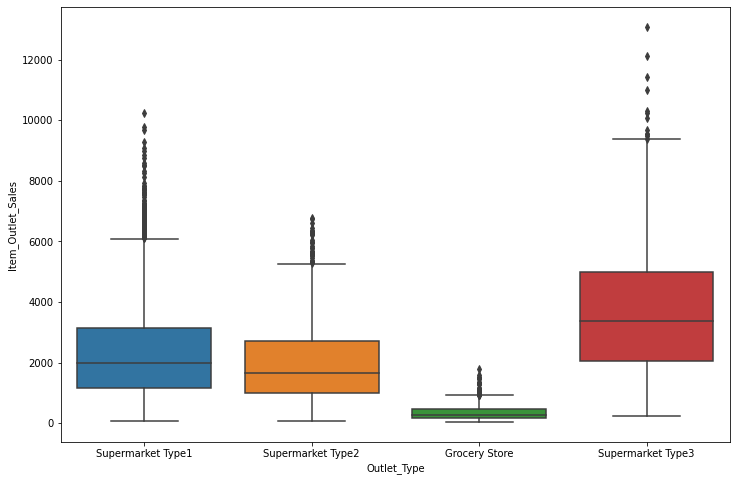

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(dataset['Outlet_Type'],dataset['Item_Outlet_Sales'])
plt.show()

In [43]:
dataset = dataset.dropna()

In [44]:
dataset.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [49]:
cat_col = []

for x in dataset.dtypes.index:
  if dataset.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [50]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [52]:
dataset['New_Item_Type'] = dataset['Item_Identifier'].apply(lambda x: x[:2])
dataset['New_Item_Type']

0       FD
1       DR
2       FD
4       NC
5       FD
        ..
8517    FD
8518    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 4650, dtype: object

In [53]:

dataset['New_Item_Type'] = dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
dataset['New_Item_Type'].value_counts()

Food              3345
Non-Consumable     866
Drinks             439
Name: New_Item_Type, dtype: int64

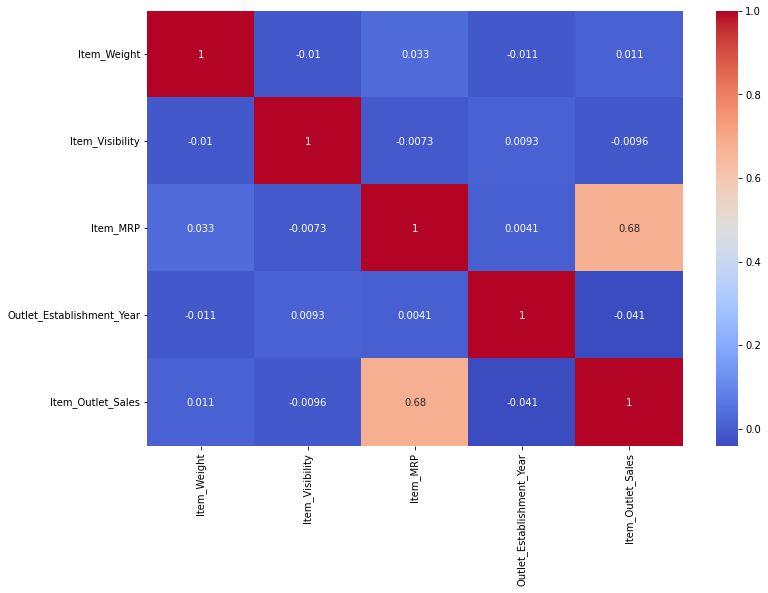

In [55]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Outlet'] = le.fit_transform(dataset['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dataset[col] = le.fit_transform(dataset[col])

In [59]:
dataset = pd.get_dummies(dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.300,0.016047,4,249.8092,OUT049,1999,3735.1380,4,0,...,1,0,1,0,0,1,0,0,1,0
1,DRC01,5.920,0.019278,14,48.2692,OUT018,2009,443.4228,1,0,...,1,0,0,0,1,0,1,1,0,0
2,FDN15,17.500,0.016760,10,141.6180,OUT049,1999,2097.2700,4,0,...,1,0,1,0,0,1,0,0,1,0
4,NCD19,8.930,0.000000,9,53.8614,OUT013,1987,994.7052,0,0,...,0,0,0,0,1,1,0,0,0,1
5,FDP36,10.395,0.000000,0,51.4008,OUT018,2009,556.6088,1,0,...,1,0,0,0,1,0,1,0,1,0


In [60]:
X = dataset.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = dataset['Item_Outlet_Sales']

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1184342.067732194
CV Score: 1195954.7181003992


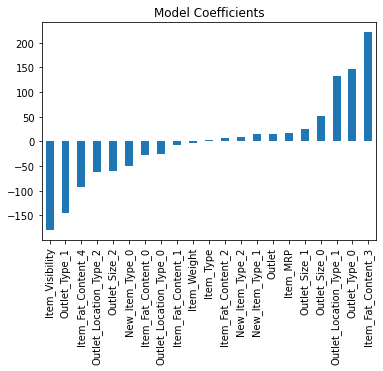

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1445453.277324397
CV Score: 1451294.8795971705


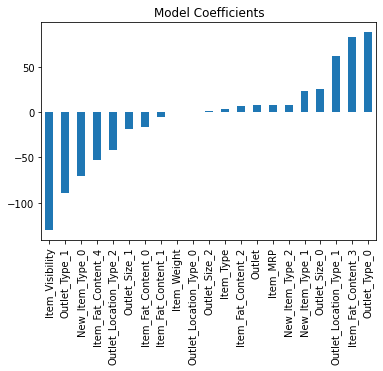

In [63]:

model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1184635.4421520233
CV Score: 1192951.7244577724


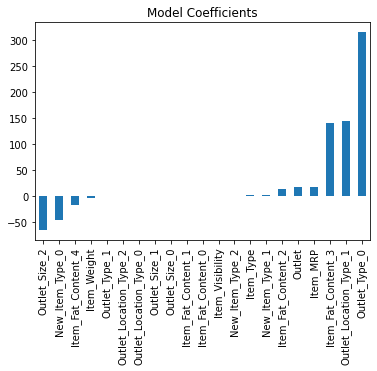

In [64]:

model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
CV Score: 2515446.5765633495


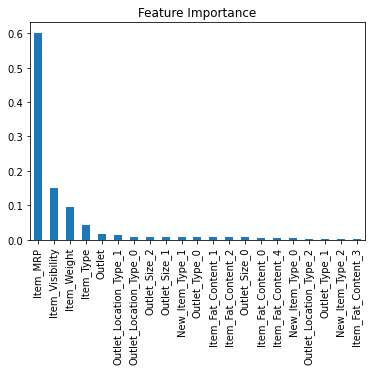

In [65]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 186319.1646995427
CV Score: 1345419.9557308792


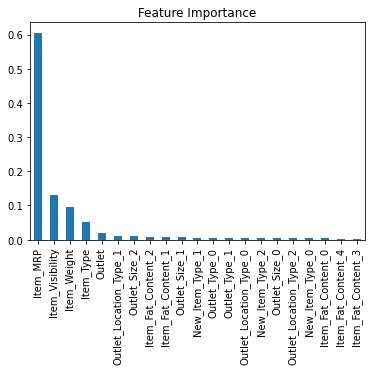

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.041875598936891884
CV Score: 1398108.6071899894


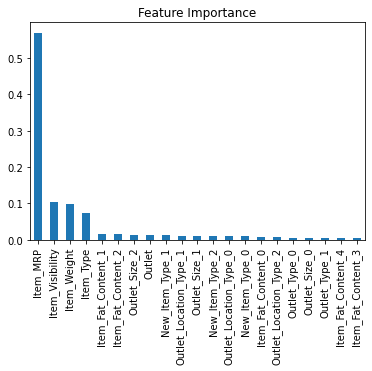

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")